In [ ]:
#John Kenney- jfk150030, Matt Brown - meb180001

In [1]:
# do this if no data is in the colab folder on the left 
# follow this link to get kaggle.jsom api  https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

In [2]:
# only do the the load in data once if aready did for your session comment out the not indented lines from below till you see stop

In [3]:
########below#########

In [15]:
          #install Kaggle
!pip install -q kaggle


In [16]:

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"loooneytunes","key":"c416840ece072aaaf9825246e48eb8d4"}'}

In [17]:
          #create a kaggle folder
! mkdir ~/.kaggle

In [18]:
          #copy the kaggle .json to folder created
! cp kaggle.json ~/.kaggle/

In [19]:
          # Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [20]:

! kaggle datasets download paultimothymooney/chest-xray-pneumonia

100% 2.28G/2.29G [00:38<00:00, 59.1MB/s]
100% 2.29G/2.29G [00:38<00:00, 63.6MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip


In [11]:
##############stop#############

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import pathlib

from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

In [23]:
PATH = '/content/chest_xray'

train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'val')
test_dir = os.path.join(PATH, 'test')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)


###################################################
###################################################
###################################################
###################################################
#Parameters to change
# Fine-tune from this layer onwards
fine_tune_at = 109
epoch = 15
base_learning_rate = 0.001
# to add or subtract dense layers add or get rid of
#x = tf.keras.layers.Dropout(0.5)(x)
#x = tf.keras.layers.Dense(# of hidden neurons,activation='relu')(x)
# add this after the pretrained model where it says 
# ##############Change deep model layers####################


In [24]:
train_dataset = image_dataset_from_directory(train_dir,
                                             labels='inferred',
                                             shuffle=True,
                                             seed = 100,
                                             validation_split = .2,
                                             subset = 'training',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.


In [25]:
val_dataset = image_dataset_from_directory(train_dir,
                                             labels='inferred',
                                             shuffle=True,
                                             seed = 100,
                                             validation_split = .2,
                                             subset = 'validation',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 5216 files belonging to 2 classes.
Using 1043 files for validation.


In [26]:
test_dataset = image_dataset_from_directory(test_dir,
                                             labels='inferred',
                                             shuffle=True,
                                             seed = 100,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 624 files belonging to 2 classes.


In [27]:
print('Number of train batches: %d' % tf.data.experimental.cardinality(train_dataset))
print('Number of val batches: %d' % tf.data.experimental.cardinality(val_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of train batches: 131
Number of val batches: 33
Number of test batches: 20


In [28]:
#image_train, label_train = train_dataset.as_numpy_iterator().next()
#image_val, label_val = val_dataset.as_numpy_iterator().next()
#image_test, label_test = test_dataset.as_numpy_iterator().next()

In [29]:
# verify that training, validation, and test data have similiar class ratios
# print("train_ratio(pneumonia/#xrays)")
# print(sum(label_train))
# print(len(label_train))
# print(sum(label_train)/len(label_train))
# print("val_ratio(pneumonia/#xrays)")
# print(sum(label_val))
# print(len(label_val))
# print(sum(label_val)/len(label_val))
# print("test_ratio(pneumonia/#xrays)")
# print(sum(label_test))
# print(len(label_test))
# print(sum(label_test)/len(label_test))

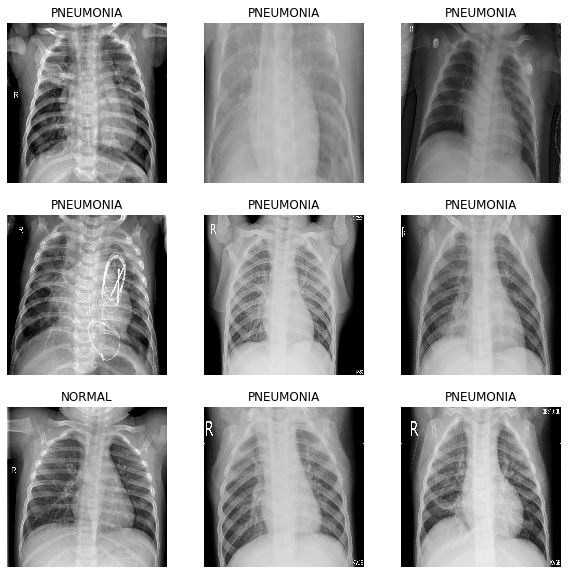

In [30]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [31]:
# optimize data reading 
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [32]:
# apply random transformations to the data, w/ random seed set
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip(seed=100),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2,seed=100),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2,seed=100),
  tf.keras.layers.experimental.preprocessing.RandomContrast(factor=.2,seed=100)
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


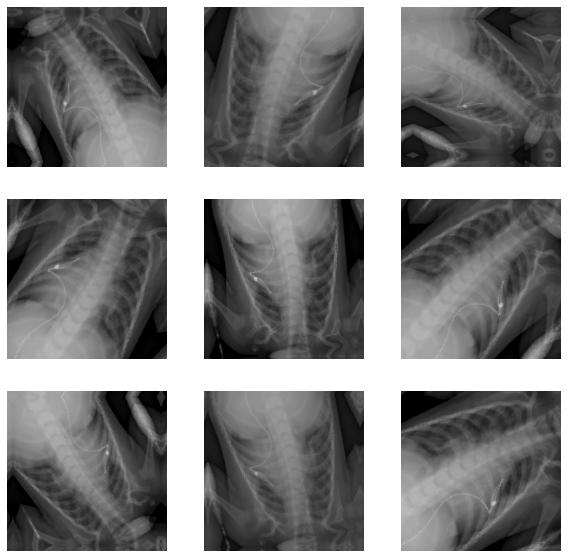

In [33]:
# take one image, augment it 9 times and display
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [34]:
# use the mobilenetv2 pre-trained convnet
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [35]:
# rescale inputs b/t [0,1]
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [36]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [37]:
#image_batch, label_batch = next(iter(train_dataset))
#feature_batch = base_model(image_batch)
#print(feature_batch.shape)

In [38]:
base_model.trainable = True

In [39]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [40]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


In [41]:
# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [42]:
layers2 = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(layers2, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])[97:]  

,Layer Type,Layer Name,Layer Trainable
97,<keras.layers.normalization.batch_normalizatio...,block_10_project_BN,False
98,<keras.layers.convolutional.Conv2D object at 0...,block_11_expand,False
99,<keras.layers.normalization.batch_normalizatio...,block_11_expand_BN,False
100,<keras.layers.advanced_activations.ReLU object...,block_11_expand_relu,False
101,<keras.layers.convolutional.DepthwiseConv2D ob...,block_11_depthwise,False
102,<keras.layers.normalization.batch_normalizatio...,block_11_depthwise_BN,False
103,<keras.layers.advanced_activations.ReLU object...,block_11_depthwise_relu,False
104,<keras.layers.convolutional.Conv2D object at 0...,block_11_project,False
105,<keras.layers.normalization.batch_normalizatio...,block_11_project_BN,False
106,<keras.layers.merge.Add object at 0x7f536d7e6390>,block_11_add,False


In [43]:
#global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
#feature_batch_average = global_average_layer(feature_batch)
#print(feature_batch_average.shape)

In [44]:
#prediction_layer = 
#prediction_batch = prediction_layer(feature_batch_average)
#print(prediction_batch.shape)

In [45]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
####################For first 2 iterations##############################
#x = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu')(x)
#x = tf.keras.layers.MaxPooling2D((2,2))(x)
#x = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(x)
#x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
##############Change deep model layers####################
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512,activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)
#x = tf.keras.layers.Dropout(0.5)(x)
#x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(64,activation='relu')(x)
#x = tf.keras.layers.Dropout(0.5)(x)
#x = tf.keras.layers.Dense(32,activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)

In [46]:

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [47]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0     

In [48]:
len(model.trainable_variables)

53

In [49]:
# without fine tuning convnet produces accuracy < 30%

#loss0, accuracy0 = model.evaluate(val_dataset)
#print("Accuracy before training: ", accuracy0)

In [50]:
# Review training loss and accuracy PLUS validation loss and accuracy over # of epochs
history = model.fit(train_dataset,
                    epochs=epoch,
                    validation_data=val_dataset)

131/131 [==============================] - 109s 791ms/step - loss: 0.5251 - accuracy: 0.7117 - val_loss: 0.8688 - val_accuracy: 0.7546


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


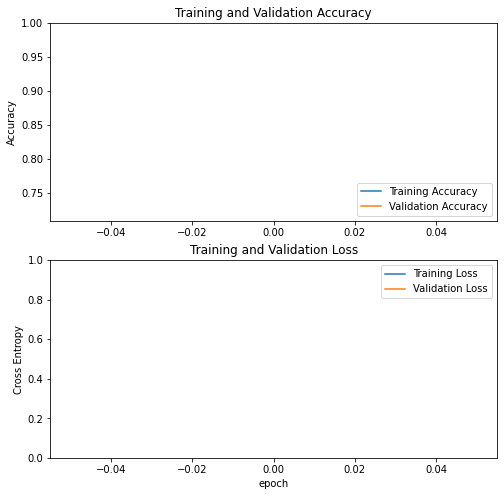

In [51]:
# Matts exploration
print(history.history.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [52]:
# Evaluate the model using the test data
loss_train, accuracy_train = model.evaluate(train_dataset)
print('Train accuracy :', accuracy_train)
loss_val, accuracy_val = model.evaluate(val_dataset)
print('Val accuracy :', accuracy_val)
loss_test, accuracy_test = model.evaluate(test_dataset)
print('Test accuracy :', accuracy_test)

131/131 [==============================] - 51s 380ms/step - loss: 0.9236 - accuracy: 0.7400
Train accuracy : 0.7399951815605164
33/33 [==============================] - 12s 349ms/step - loss: 0.8688 - accuracy: 0.7546
Val accuracy : 0.7545541524887085
20/20 [==============================] - 7s 323ms/step - loss: 1.7663 - accuracy: 0.6250
Test accuracy : 0.625


Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels:
 [0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1]


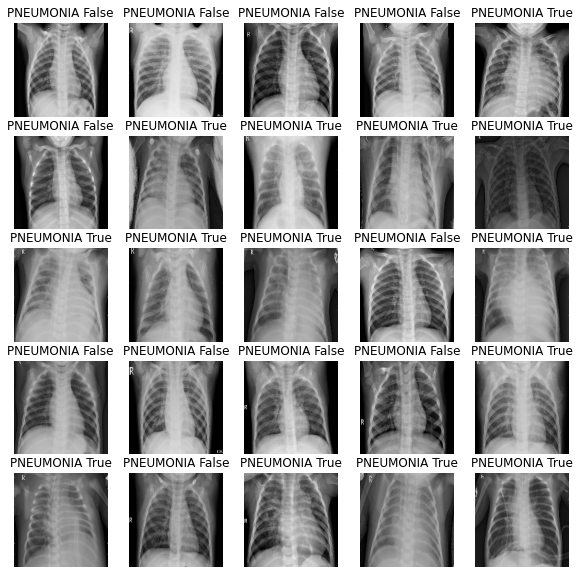

In [53]:
# Retrieve a batch of images and corresponding labels from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()

# Retrieve the models predictions on the test data
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
# Apply 0.5 threshold 
predictions = tf.where(predictions < 0.5, 0, 1)

# Look at the 32 predicted labels and corresponding true labels
print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

# make each figure have 10*10 dimensions
plt.figure(figsize=(10, 10))

# Answer to Q2 portion of Submission
# Examine the accuracy of the predicted labels of the first 28 images
for i in range(25):
  ax = plt.subplot(5, 5, i + 1)
  correct_pred = "False"
  if (predictions[i] == label_batch[i]):
    correct_pred = "True"
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]] + " " + correct_pred)
  plt.axis("off")

In [54]:
# Matts exploration

# determine test error rate for the batch
err_count = 0
for i in range(len(label_batch)):
  pred_label = predictions.numpy()[i]
  true_label = label_batch[i]
  if (pred_label != true_label):
    err_count = err_count + 1
print("Test error rate: ", (err_count / len(label_batch))*100, "%")


Test error rate:  46.875 %


In [55]:
# Predict test data using the pretrained model on the full test dataset
#pred = model.predict(test_dataset)

# Applying the sigmoid function
#pred = tf.nn.sigmoid(pred)
# Apply 0.5 threshold
#pred = tf.where(pred < 0.5, 0, 1)

In [56]:
#pred[:,0]
